# Plot spider


In [41]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

from local_python.general_utils import select_and_sort_dataframe
from local_python.radar_chart import radar_factory

In [42]:
path_f1_scores_grouped = "../results/f1_scores.csv"
dataset_order = [
    "PlantDoc",
    "PAD-UFES-20",
    "DDI",
    "HAM10000",
    "Fitzpatrick17k",
    "Cassava",
    "PlantVillage",
    "PlantDataset",
]
print_baseline = False
selected_architecture = ["ViT_T16", "ResNet50"][0]

In [43]:
colors = []
columns = []
column_labels = []

if "ResNet50" == selected_architecture:
    colors = [
        "r",
        "b",
        # "skyblue",
        "limegreen",
        "black",
    ]
    columns = [
        "Derma_SSL_SimCLR",
        "ImageNet_1k_SL_V1",
        # "ImageNet_1k_SSL_SimCLR",
        "PDDD",
        "Random",
    ]
    column_labels = [
        "Dermatology SSL",
        "ImageNet SL",
        # "ImageNet SSL",
        "Plant SL",
        "Random",
    ]
elif "ViT_T16" == selected_architecture:
    colors = [
        "r",
        # "skyblue",
        "b",
        # "m",
        "limegreen",
        "black",
    ]
    columns = [
        "Derma",
        # "ImageNet_1k_SL_WinKawaks",
        "ImageNet_1k_SSL_Dino",
        # "ImageNet_AugReg",
        "Plant",
        "Random",
    ]
    column_labels = [
        "Dermatology SSL",
        # "ImageNet SL",
        "ImageNet SSL",
        # "ImageNet AR",
        "Plant SSL",
        "Random",
    ]
else:
    print(f"Unknown architecture selected: {selected_architecture}")

In [44]:
def filter_and_unstack(df, filter_config):
    for filter_key, filter_list in filter_config.items():
        assert (
            filter_key in df.columns.values
        ), f"No column found with name {filter_key}"
        df = df[df[filter_key].isin(filter_list)]
    df = df[
        [
            "downstream",
            "pre-training",
            "f1_macro_mean",
            "f1_macro_std",
            "f1_macro_count",
        ]
    ]  # , "model_name"
    df["downstream"] = pd.Categorical(
        df["downstream"],
        [col for col in dataset_order if col in df["downstream"].unique()],
    )
    return df.set_index(["pre-training", "downstream"]).unstack(level=0)


light_red = (0.95, 0.9, 0.9)
light_green = (0.9, 0.95, 0.9)


def plot_spider_axis(ax, title, df_plot):
    for i, column in enumerate(columns):
        color = colors[i] if i < len(colors) else None
        ax.set_theta_offset(rotation_offset)
        mean_values = df_plot[("f1_macro_mean", column)].values
        std_err = df_plot[("f1_macro_std", column)].values / np.sqrt(
            df_plot[("f1_macro_count", column)].values
        )
        ax.plot(
            theta, mean_values - std_err, color=color, label="_nolegend_", alpha=0.60
        )
        ax.plot(
            theta, mean_values + std_err, color=color, label="_nolegend_", alpha=0.60
        )
        ax.fill_between(
            theta,
            mean_values - std_err,
            mean_values + std_err,
            facecolor=color,
            label=column,
            alpha=0.40,
        )

    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title)
    ax.set_varlabels(df_plot["f1_macro_mean"].index)
    # ax.legend(df_plot.index.values, loc=(0.9, 0.95), labelspacing=0.1, fontsize="small")
    north = np.pi / 2 - rotation_offset
    # ax.axvspan(north, np.pi + north, facecolor=light_red, alpha=0.7)
    # ax.axvspan(np.pi + north, 2 * np.pi + north, facecolor=light_green, alpha=0.7)

In [45]:
df_master = pd.read_csv(path_f1_scores_grouped, index_col=0)
df_master

,architecture,downstream,pre-training,number_of_samples,model_name,f1_macro_mean,f1_macro_std,f1_macro_count
0,ResNet50,Cassava,Derma_SSL_SimCLR,1,dc,0.019217,0.000000,100
1,ResNet50,Cassava,Derma_SSL_SimCLR,1,knn,0.184686,0.035744,100
2,ResNet50,Cassava,Derma_SSL_SimCLR,1,lr,0.163515,0.045919,100
3,ResNet50,Cassava,Derma_SSL_SimCLR,10,dc,0.019217,0.000000,100
4,ResNet50,Cassava,Derma_SSL_SimCLR,10,knn,0.208679,0.018469,100
...,...,...,...,...,...,...,...,...
1480,ViT_T16,PlantVillage,Random,3,knn,0.128046,0.010907,100
1481,ViT_T16,PlantVillage,Random,3,lr,0.175155,0.013696,100
1482,ViT_T16,PlantVillage,Random,30,dc,0.000604,0.000000,100
1483,ViT_T16,PlantVillage,Random,30,knn,0.205410,0.007056,100


In [46]:
df_plot_l = filter_and_unstack(
    df_master,
    {
        "number_of_samples": ["None"],
        "architecture": [selected_architecture],
        "model_name": ["knn"],
        "downstream": dataset_order,
    },
)

df_plot_r = filter_and_unstack(
    df_master,
    {
        "number_of_samples": ["None"],
        "architecture": [selected_architecture],
        "model_name": ["lr"],
        "downstream": dataset_order,
    },
)

df_plot_d = filter_and_unstack(
    df_master,
    {
        "number_of_samples": ["None"],
        "architecture": [selected_architecture],
        "model_name": ["dc"],
        "downstream": dataset_order,
    },
)

Labels before: ['Derma', 'ImageNet_1k_SSL_Dino', 'Plant', 'Random']
Labels after: ['Dermatology SSL', 'ImageNet SSL', 'Plant SSL', 'Random']


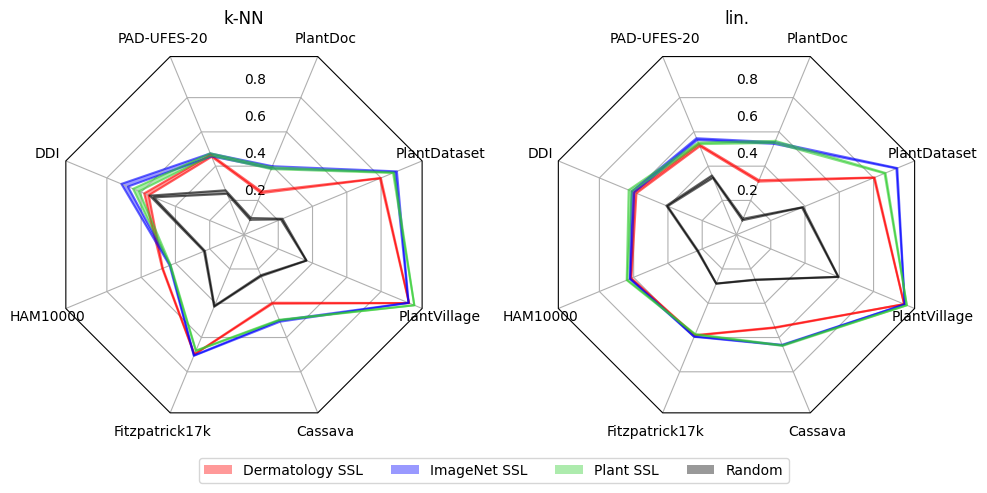

In [47]:
baseline_postfix = ""

number_of_categories = len(dataset_order)
rotation_offset = np.pi / 2 - np.pi / number_of_categories

theta = radar_factory(
    number_of_categories, frame="polygon", rotation_offset=rotation_offset
)

fig, axes = plt.subplots(
    figsize=(10, 5),
    nrows=1,
    ncols=2,
    subplot_kw=dict(projection="radar"),
    squeeze=False,
)
if print_baseline:
    baseline_postfix = "_baseline"
    plot_spider_axis(axes.flat[0], "baseline", df_plot_d)
    plot_spider_axis(axes.flat[1], "baseline", df_plot_d)

plot_spider_axis(axes.flat[0], "k-NN", df_plot_l)
plot_spider_axis(axes.flat[1], "lin.", df_plot_r)

lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

print(f"Labels before: {labels}")
labels = column_labels
print(f"Labels after: {labels}")

fig.tight_layout()
fig.legend(
    lines,
    labels,

    loc="upper center",
    bbox_to_anchor=(0.5, 0.05),
    ncol=len(labels),
)

postfix = selected_architecture.lower().replace(" ", "_") + baseline_postfix + ".png"
plt.savefig(f"../images/spider_{postfix}", bbox_inches="tight")